### Programming Assignment 4: ***Support Vector Machine***
# <span style="color:#FC6C85;">**BREAST CANCER WISCONSIN DATASET**</span> <img src="Icon.png" style="width:100px; height:100px; vertical-align:middle">
#### Group Members:
**Bolinas**, Denisse Roxanne H.  
**De Leola**, Miguel S.  
**Ugates**, John Rhey T.  

---

## **Dataset**

### ***Import Neccesary Libraries***

In [457]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---

## **General Guidelines**

### ***1. Load Wisconsin Breast Cancer dataset.*** 

In [458]:
# 1. Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame for better visualization (optional)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Print the head of the DataFrame
print(X.head())

# Display basic information
print(f"\nTotal number of rows: {X.shape[0]}")
print(f"Total number of columns: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Class labels: {data.target_names}")

# Check for missing values
missing_values = X.isnull().sum().sum()
print(f"\nNumber of missing values: {missing_values}")

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

### ***2. Split the dataset into 70% training and 30% testing***

In [459]:
# 2. Split the dataset into 70% Training and 30% Testing, using stratify to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify the split
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

Training set shape: (398, 30)
Testing set shape: (171, 30)
Training set class distribution: [148 250]
Testing set class distribution: [ 64 107]


### ***3. Preprocess the data:***

- #### ***Use StandardScaler to normalize feature values.***

In [460]:
# 3. Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check mean and standard deviation of scaled features (should be ~0 and ~1)
print("Mean of scaled training features:")
print(np.mean(X_train_scaled, axis=0)[:5])  # Show first 5 features
print("\nStandard deviation of scaled training features:")
print(np.std(X_train_scaled, axis=0)[:5])  # Show first 5 features

Mean of scaled training features:
[-4.97480337e-15  2.74863884e-15  2.03912822e-15  1.39921575e-15
  4.32143154e-15]

Standard deviation of scaled training features:
[1. 1. 1. 1. 1.]


### ***4. Training the SVM model using sklearn.svm.SVC with default parameters.***

Default SVM Accuracy: 0.9766

Classification Report for Default SVM:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



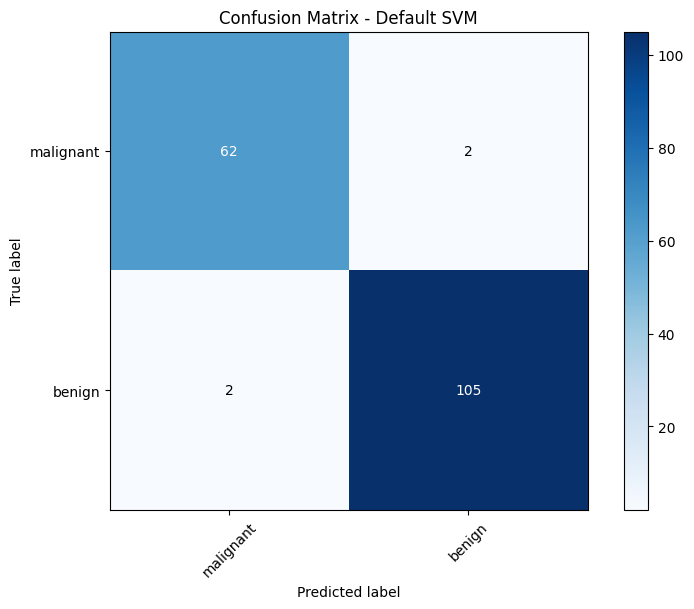

In [461]:
# 4. Train an SVM model with default parameters
default_svm = SVC(random_state=42)
default_svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_default = default_svm.predict(X_test_scaled)

# Evaluate the model
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Default SVM Accuracy: {accuracy_default:.4f}")
print("\nClassification Report for Default SVM:")
print(classification_report(y_test, y_pred_default, target_names=data.target_names))

# Display confusion matrix
cm_default = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(8, 6))
plt.imshow(cm_default, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Default SVM')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)

# Add text annotations to each cell
thresh = cm_default.max() / 2
for i in range(cm_default.shape[0]):
    for j in range(cm_default.shape[1]):
        plt.text(j, i, format(cm_default[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_default[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### ***5. Perform Hyperparameter Tuning using GridSearchCV to optimize:***

- #### ***C (Regularization parameter)***
- #### ***Gamma (Kernel coefficient for RBF)***
- #### ***Kernel type (linear, rbf, poly)***

Starting grid search for SVM hyperparameters...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.9799

Best SVM Model Accuracy on Test Set: 0.9708

Classification Report for Best SVM Model:
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        64
      benign       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



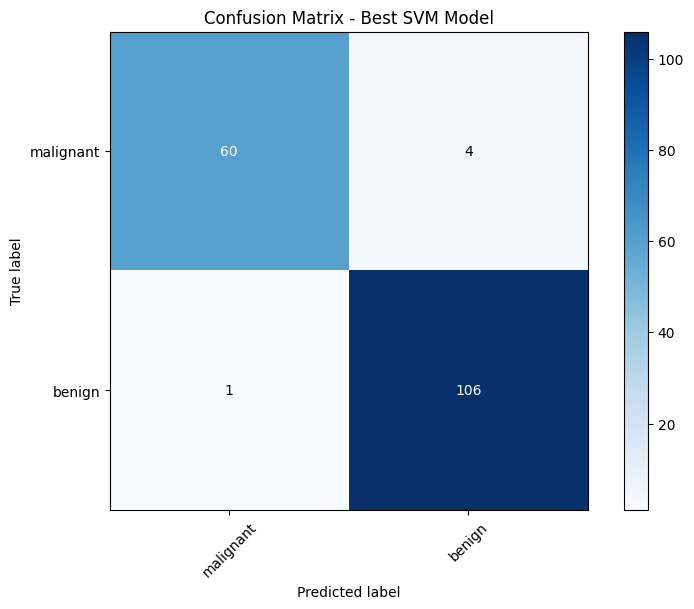

In [462]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
print("Starting grid search for SVM hyperparameters...")
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and best score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nBest SVM Model Accuracy on Test Set: {accuracy_best:.4f}")
print("\nClassification Report for Best SVM Model:")
print(classification_report(y_test, y_pred_best, target_names=data.target_names))

# Display confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
plt.imshow(cm_best, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best SVM Model')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)

# Add text annotations to each cell
thresh = cm_best.max() / 2
for i in range(cm_best.shape[0]):
    for j in range(cm_best.shape[1]):
        plt.text(j, i, format(cm_best[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_best[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### ***6. Evaluate the trained model:***

- #### ***Compute training and testing accuracy.***

In [463]:
# Calculate training and testing accuracy
y_train_pred = best_svm.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Model Accuracy:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {accuracy_best:.4f}")
print(f"Difference (Training - Testing): {(train_accuracy - accuracy_best):.4f}")

Model Accuracy:
Training Accuracy: 0.9874
Testing Accuracy: 0.9708
Difference (Training - Testing): 0.0167


- #### ***Identify the most important features using SelectFromModel.***

In [464]:
# For feature importance, train a linear SVM if the best model isn't linear
if best_svm.kernel == 'linear':
    feature_importance_model = best_svm
else:
    feature_importance_model = SVC(kernel='linear', C=1.0)
    feature_importance_model.fit(X_train_scaled, y_train)
    
# Get feature importance
importance = np.abs(feature_importance_model.coef_[0])

# Create DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Display top 10 important features
print("Top 10 Most Important Features:")
for i, (feature, importance) in enumerate(zip(feature_importance['Feature'][:10], 
                                          feature_importance['Importance'][:10])):
    print(f"{i+1}. {feature}: {importance:.4f}")

Top 10 Most Important Features:
1. worst texture: 1.1240
2. worst area: 0.9410
3. area error: 0.7662
4. worst radius: 0.7571
5. worst concavity: 0.7394
6. worst concave points: 0.6975
7. worst smoothness: 0.6422
8. worst perimeter: 0.6417
9. mean compactness: 0.6405
10. texture error: 0.5675


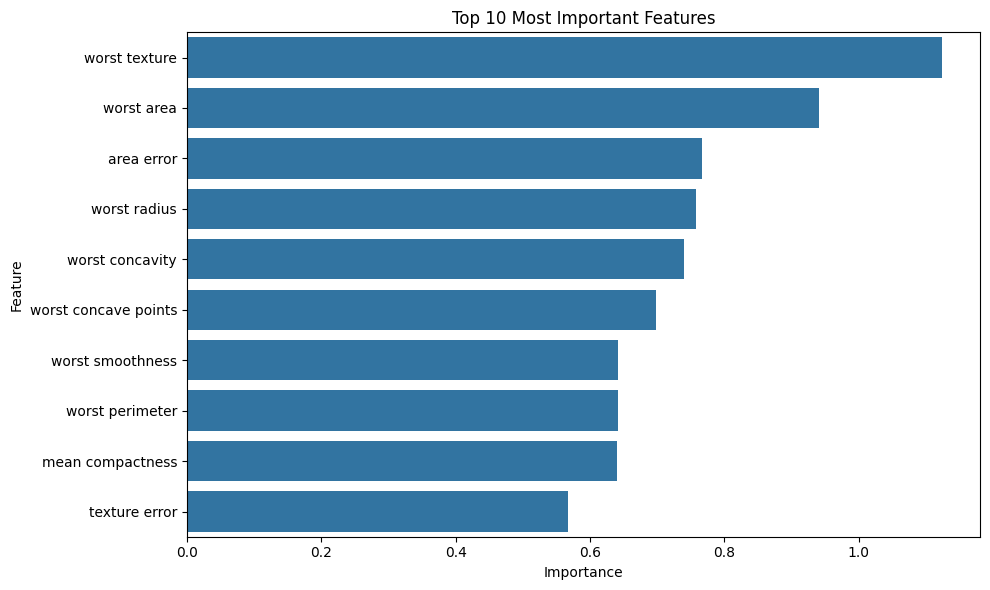

In [465]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

- #### ***Generate a confusion matrix and calculate: F1-score, Precision, Recall, False Alarm Rate***

In [466]:
# Calculate detailed performance metrics
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

# Calculate False Alarm Rate (Fall-out or FPR)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
false_alarm_rate = fp / (fp + tn)

# Display metrics in a clean format
print("Performance Metrics:")
print(f"Accuracy:          {accuracy_best:.4f}")
print(f"F1-Score:          {f1:.4f}")
print(f"Precision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"False Alarm Rate:  {false_alarm_rate:.4f}")

Performance Metrics:
Accuracy:          0.9708
F1-Score:          0.9770
Precision:         0.9636
Recall:            0.9907
False Alarm Rate:  0.0625


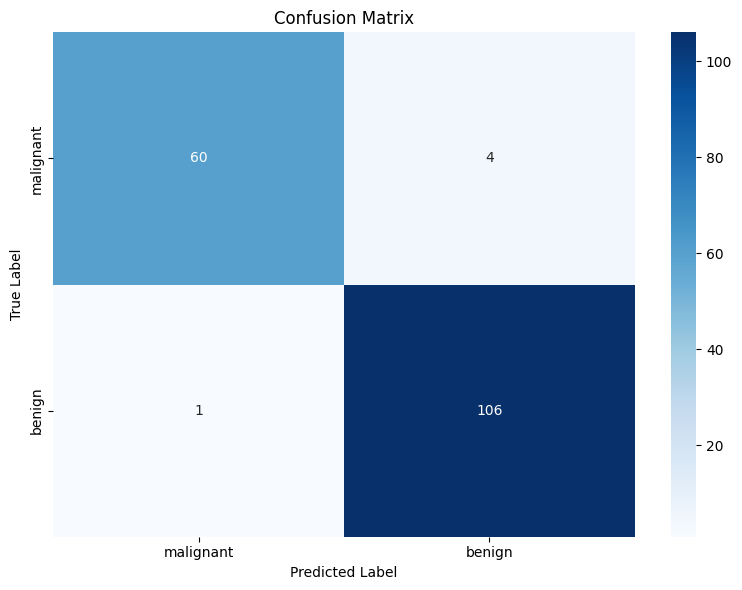

In [467]:
# Generate and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

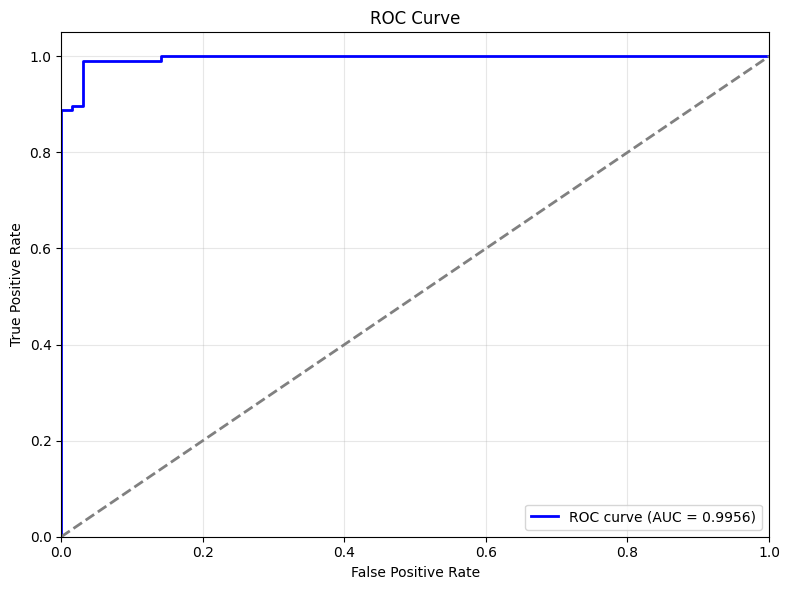

In [468]:
# Generate ROC curve
if hasattr(best_svm, 'decision_function'):
    y_scores = best_svm.decision_function(X_test_scaled)
else:
    y_scores = best_svm.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [469]:
# Get per-class metrics
class_report = classification_report(y_test, y_pred_best, 
                                    target_names=data.target_names,
                                    output_dict=True)

# Calculate False Alarm Rate for each class
class_far = {}
for i, class_name in enumerate(data.target_names):
    # Create binary classification for current class
    y_binary = (y_test == i).astype(int)
    y_pred_binary = (y_pred_best == i).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_binary, y_pred_binary).ravel()
    class_far[class_name] = fp / (fp + tn)

# Format for cleaner display
print("Performance by Class:")
print(f"{'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'FAR':<10}")
print("-" * 55)
for class_name in data.target_names:
    print(f"{class_name:<15} {class_report[class_name]['precision']:<10.4f} "
          f"{class_report[class_name]['recall']:<10.4f} "
          f"{class_report[class_name]['f1-score']:<10.4f} "
          f"{class_far[class_name]:<10.4f}")

Performance by Class:
Class           Precision  Recall     F1-Score   FAR       
-------------------------------------------------------
malignant       0.9836     0.9375     0.9600     0.0093    
benign          0.9636     0.9907     0.9770     0.0625    


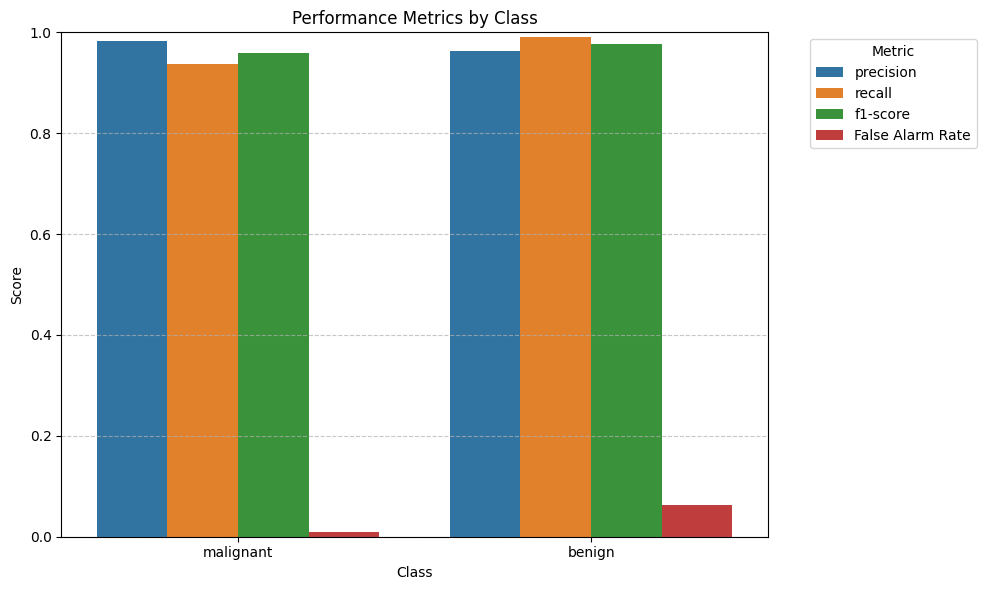

In [470]:
# Visualize per-class metrics including False Alarm Rate
metrics_to_plot = ['precision', 'recall', 'f1-score']
class_data = {
    'Metric': [],
    'Score': [],
    'Class': []
}

for class_name in data.target_names:
    for metric in metrics_to_plot:
        class_data['Metric'].append(metric)
        class_data['Score'].append(class_report[class_name][metric])
        class_data['Class'].append(class_name)
    
    # Add False Alarm Rate calculation for each class
    if class_name == data.target_names[0]:  # Calculate for benign class
        y_binary = (y_test == 0).astype(int)
        y_pred_binary = (y_pred_best == 0).astype(int)
    else:  # Calculate for malignant class
        y_binary = (y_test == 1).astype(int)
        y_pred_binary = (y_pred_best == 1).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_binary, y_pred_binary).ravel()
    class_far = fp / (fp + tn)
    
    class_data['Metric'].append('False Alarm Rate')
    class_data['Score'].append(class_far)
    class_data['Class'].append(class_name)

class_df = pd.DataFrame(class_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Score', hue='Metric', data=class_df)
plt.title('Performance Metrics by Class')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---

## ***Guide Questions***

### **1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?**

The dataset was preprocessed by first confirming there were no missing values to address. Feature scaling was then applied using `StandardScaler` to standardize all features. This normalization ensures all features contribute equally to the model by centering them to a mean of 0 and scaling to a standard deviation of 1, which mitigates bias from features with larger magnitudes and improves algorithm convergence that is critical for SVMs that rely on distance-based metrics like the RBF kernel.

---

### **2. Why is it necessary to split the dataset into training and testing sets?**

- **Evaluate generalization**: Test the model on unseen data to measure how well it performs in real-world scenarios (avoiding overfitting to the training data).

- **Validate performance**: Detect issues like overfitting (high training accuracy but poor testing accuracy) and ensure the model learns patterns, not noise.

---

### **3. What is the role of StandardScaler in SVM training?**

The `StandardScaler` ensures all features are scaled to have a mean of 0 and standard deviation of 1. This is critical for SVM, which relies on distance-based calculations (e.g., kernels like RBF), as it prevents features with larger scales from dominating the model and ensures fair regularization. Proper scaling improves convergence speed, accuracy, and the model's ability to generalize.

---

### **4. How does C affect the performance of an SVM model?**

The `C parameter` in an SVM model controls the trade-off between maximizing the margin (distance between classes) and minimizing classification errors on the training data.

- **High C** (e.g., C = 1000): → Focus on training accuracy (risk of overfitting).
- **low C** (e.g., C = 0.1): → Focus on margin smoothness (risk of underfitting).

Choosing the right C (via cross-validation) ensures the model adapts to data complexity without memorizing noise.

---

### **5. What is the purpose of the kernel function in SVM?**

The `kernel function` in SVM serves to `transform non-linearly separable data` into a higher-dimensional space where a linear decision boundary (hyperplane) can effectively separate classes. Instead of explicitly computing complex transformations, the kernel uses `mathematical shortcuts (the "kernel trick")` to calculate similarity between data points in this new space, enabling SVM to handle intricate patterns while maintaining computational efficiency

---

### **6. What were the best hyperparameters found using GridSearchCV?**

**Best hyperparameters:**
 - C = 10
 - gamma = 0.001
 - kernel = rbf

---

### **7. What is a confusion matrix, and how is it interpreted?**

A confusion matrix is a table used to evaluate classification model performance by showing the counts of true and false predictions compared to actual values. It typically has four cells for binary classification:

- `True Positives (TP)`: Correctly predicted positive cases
- `False Positives (FP)`: Incorrectly predicted positive cases (Type I error)
- `False Negatives (FN)`: Incorrectly predicted negative cases (Type II error)
- `True Negatives (TN)`: Correctly predicted negative cases

It displays model performance as a grid where diagonal elements (TP, TN) represent correct predictions and off-diagonal elements (FP, FN) represent errors, with better performance indicated by higher diagonal and lower off-diagonal values, enabling calculation of metrics like accuracy and precision while revealing potential model bias through error distribution patterns, and expanding into larger grids for multi-class problems with rows showing true classes and columns showing predicted classes.

---

### **8. How are Precision, Recall, and F1-score calculated from the confusion matrix?**

Precision, Recall, and F1-score are calculated from the confusion matrix using the following formulas:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
F1\text{-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


---

### **9. If the model does not perform well, what adjustments can be made to improve it?**

To improve an underperforming SVM model, adjust the kernel type, tune the regularization parameter C and gamma, implement proper feature scaling, handle class imbalance with weights, select relevant features, address outliers, apply dimensionality reduction, and consider probability calibration for better decision boundaries.

---